In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [53]:
def get_matrix_for_piece(P):
    R = [[0,0,0,0,0] for _ in range(5)]
    for x in range(5):
        for y in range(5):
            if 5 * y + x in P:
                R[x][y] = 1
    return R

def rotate_matrix(M):
    R = [[0,0,0,0,0] for _ in range(5)]
    for x in range(5):
        for y in range(5):
            R[y][4-x] = M[x][y]
    return R

def vflip_matrix(M):
    R = [[0,0,0,0,0] for _ in range(5)]
    for x in range(5):
        for y in range(5):
            R[x][y] = M[4-x][y]
    return R

def hflip_matrix(M):
    R = [[0,0,0,0,0] for _ in range(5)]
    for x in range(5):
        for y in range(5):
            R[x][y] = M[x][4-y]
    return R

In [54]:
Z = [0, 1, 5, 6, 11, 12, 16, 17]
I = [0, 1, 2, 3, 5, 6, 7, 8]
L = [2, 3, 7, 8, 10, 11, 12, 13]
U = [0, 5, 10, 11, 12, 13, 8, 3]
Y = [0, 1, 2, 5, 6, 7, 11, 16]
B = [0, 1, 2, 5, 6, 7, 10, 11]
T = [1, 2, 6, 7, 10, 11, 12, 13]
P = [1, 6, 10, 11, 15, 16, 20, 21]
pieces = [Z, I, L, U, Y, B, T, P]
configurations = [4, 2, 4, 4, 4, 4, 4, 4]
names = ['Z', 'I', 'L', 'U', 'Y', 'B', 'T', 'P']
pieces = [get_matrix_for_piece(p) for p in pieces]

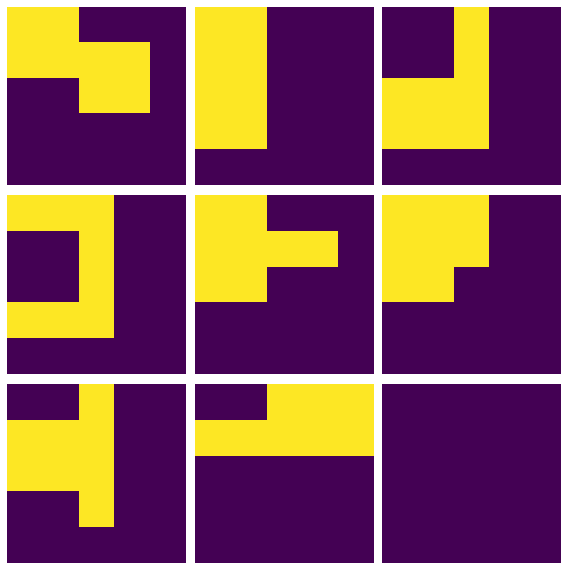

In [55]:
plt.subplots(3, 3, figsize=(8, 8))
curr_plot = 0
for i, p in enumerate(pieces):
    plt.subplot(3, 3, curr_plot + 1)
    plt.axis('off')
    plt.imshow(p)
    curr_plot += 1
plt.subplot(3,3,9)
plt.imshow(np.eye(3)*0)
plt.axis('off')
plt.tight_layout(pad=1)

In [60]:
def shift(x, n):
    return x[n:] + x[:n]

In [91]:
def align_x(S):
    empty = True
    while empty:
        for x in range(len(S)):
            if S[x][0] == 1:
                empty = False
                break
        if empty:
            for x in range(len(S)):
                S[x] = shift(S[x], 1)
    return S

In [92]:
def align_y(S):
    empty = True
    while empty:
        for y in range(len(S)):
            if S[0][y] == 1:
                empty = False
                break
        if empty:
            S = shift(S, 1)
    return S

In [93]:
def align(S):
    S = list(S)
    S = align_x(S)
    S = align_y(S)
    return S

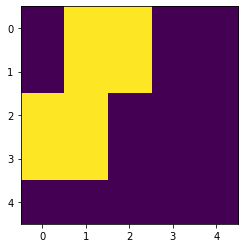

In [95]:
plt.imshow(align(rotate_matrix(shape)))

In [90]:
align_y(align_x(rotate_matrix(rotate_matrix(shape))))

[[1, 1, 0, 0, 0],
 [1, 1, 1, 1, 0],
 [0, 0, 1, 1, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]

In [178]:
def plot_configurations(piece):
    plt.subplots(4,4,figsize=(8,8))
    plot_index = 1
    
    S = []
    L = []

    for rot in range(4):
        piece = rotate_matrix(piece)
        plt.subplot(4,4,plot_index)
        plot_index += 1
        aligned_piece = align(piece)
        plt.imshow(aligned_piece)
        S.append(tuple([tuple(x) for x in aligned_piece]))
        L.append(aligned_piece)
        plt.title('rot {} - no flip'.format(rot + 1))
        plt.axis('off')

    piece = hflip_matrix(piece)

    for rot in range(4):
        piece = rotate_matrix(piece)
        plt.subplot(4,4,plot_index)
        plot_index += 1
        aligned_piece = align(piece)
        plt.imshow(aligned_piece)
        S.append(tuple([tuple(x) for x in aligned_piece]))
        L.append(aligned_piece)
        plt.title('rot {} - h-flip'.format(rot + 1))
        plt.axis('off')

    piece = hflip_matrix(piece)
    piece = vflip_matrix(piece)

    for rot in range(4):
        piece = rotate_matrix(piece)
        plt.subplot(4,4,plot_index)
        plot_index += 1
        aligned_piece = align(piece)
        plt.imshow(aligned_piece)
        S.append(tuple([tuple(x) for x in aligned_piece]))
        L.append(aligned_piece)
        plt.title('rot {} - v-flip'.format(rot + 1))
        plt.axis('off')

    piece = hflip_matrix(piece)

    for rot in range(4):
        piece = rotate_matrix(piece)
        plt.subplot(4,4,plot_index)
        plot_index += 1
        aligned_piece = align(piece)
        plt.imshow(aligned_piece)
        S.append(tuple([tuple(x) for x in aligned_piece]))
        L.append(aligned_piece)
        plt.title('rot {} - hv-flip'.format(rot + 1))
        plt.axis('off')

    S = set(S)
    
    s = list(S)
    s = [list([list(q) for q in r]) for r in s]
    
    plt.show()
    
    print('Configurations: \r\n')
    for l in s:
        print(np.matrix(l))

    plt.tight_layout(pad=1)
    print('Total configurations: {}'.format(len(S)))
    
    return s if s is not None else []

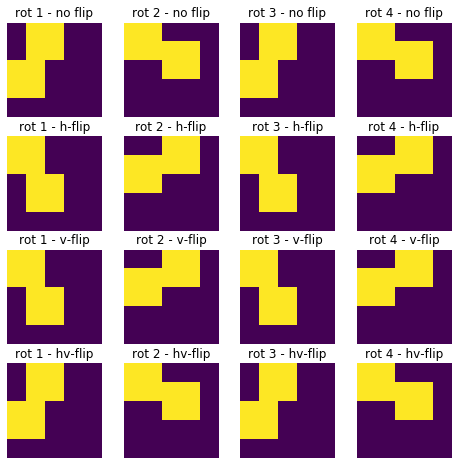

Configurations: 

[[1 1 0 0 0]
 [1 1 1 1 0]
 [0 0 1 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[[0 0 1 1 0]
 [1 1 1 1 0]
 [1 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[[1 1 0 0 0]
 [1 1 0 0 0]
 [0 1 1 0 0]
 [0 1 1 0 0]
 [0 0 0 0 0]]
[[0 1 1 0 0]
 [0 1 1 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [0 0 0 0 0]]
Total configurations: 4


<Figure size 432x288 with 0 Axes>

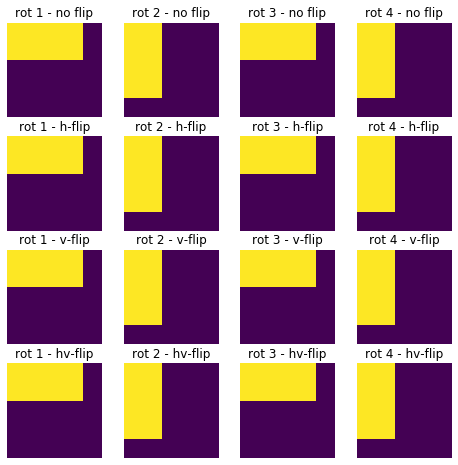

Configurations: 

[[1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [0 0 0 0 0]]
[[1 1 1 1 0]
 [1 1 1 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
Total configurations: 2


<Figure size 432x288 with 0 Axes>

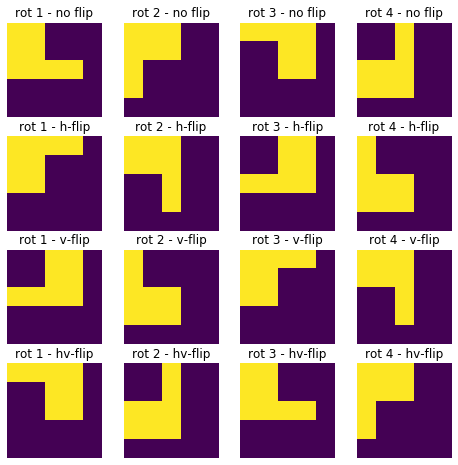

Configurations: 

[[1 1 1 0 0]
 [1 1 1 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 0]]
[[1 1 1 0 0]
 [1 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]]
[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 0 0]
 [1 1 1 0 0]
 [0 0 0 0 0]]
[[1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 1 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[[1 1 1 1 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[[0 0 1 1 0]
 [0 0 1 1 0]
 [1 1 1 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[[1 1 1 1 0]
 [0 0 1 1 0]
 [0 0 1 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 1 1 0 0]
 [1 1 1 0 0]
 [0 0 0 0 0]]
Total configurations: 8


<Figure size 432x288 with 0 Axes>

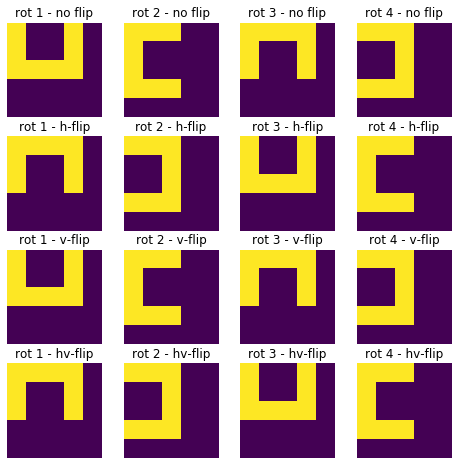

Configurations: 

[[1 0 0 1 0]
 [1 0 0 1 0]
 [1 1 1 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[[1 1 1 1 0]
 [1 0 0 1 0]
 [1 0 0 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[[1 1 1 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 1 1 0 0]
 [0 0 0 0 0]]
[[1 1 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 0 0]
 [0 0 0 0 0]]
Total configurations: 4


<Figure size 432x288 with 0 Axes>

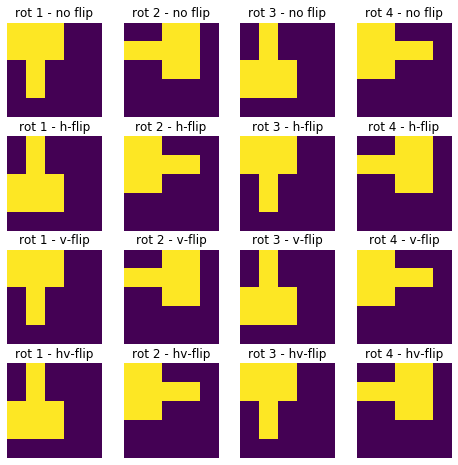

Configurations: 

[[1 1 1 0 0]
 [1 1 1 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 0]]
[[1 1 0 0 0]
 [1 1 1 1 0]
 [1 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[[0 1 0 0 0]
 [0 1 0 0 0]
 [1 1 1 0 0]
 [1 1 1 0 0]
 [0 0 0 0 0]]
[[0 0 1 1 0]
 [1 1 1 1 0]
 [0 0 1 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
Total configurations: 4


<Figure size 432x288 with 0 Axes>

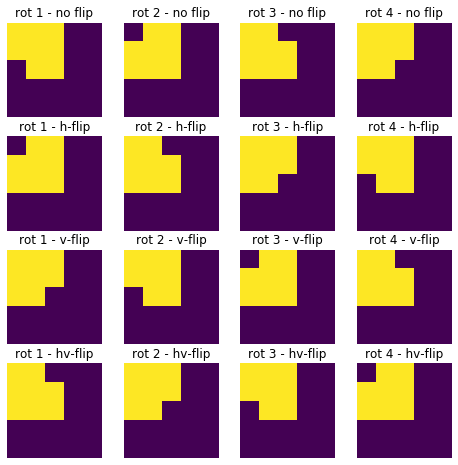

Configurations: 

[[1 1 1 0 0]
 [1 1 1 0 0]
 [1 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[[1 1 1 0 0]
 [1 1 1 0 0]
 [0 1 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[[1 1 0 0 0]
 [1 1 1 0 0]
 [1 1 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[[0 1 1 0 0]
 [1 1 1 0 0]
 [1 1 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
Total configurations: 4


<Figure size 432x288 with 0 Axes>

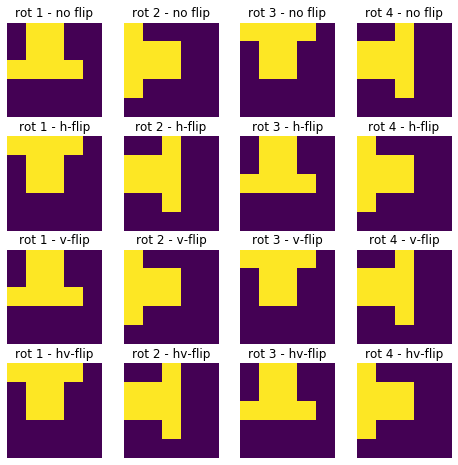

Configurations: 

[[0 1 1 0 0]
 [0 1 1 0 0]
 [1 1 1 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[[0 0 1 0 0]
 [1 1 1 0 0]
 [1 1 1 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]]
[[1 0 0 0 0]
 [1 1 1 0 0]
 [1 1 1 0 0]
 [1 0 0 0 0]
 [0 0 0 0 0]]
[[1 1 1 1 0]
 [0 1 1 0 0]
 [0 1 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
Total configurations: 4


<Figure size 432x288 with 0 Axes>

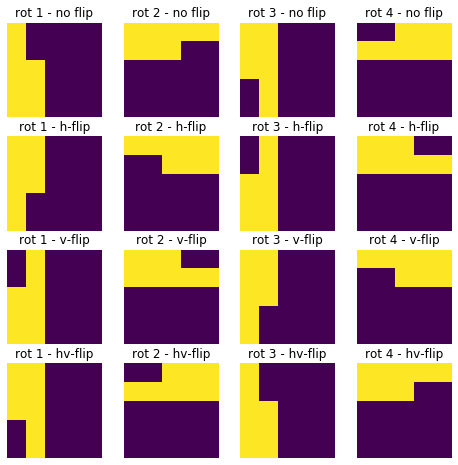

Configurations: 

[[1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]
[[1 1 1 1 1]
 [1 1 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]]
[[1 1 1 0 0]
 [1 1 1 1 1]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[[1 1 1 1 1]
 [0 0 1 1 1]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[[0 1 0 0 0]
 [0 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]]
[[1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]
[[0 0 1 1 1]
 [1 1 1 1 1]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
Total configurations: 8


<Figure size 432x288 with 0 Axes>

In [179]:
unique_pieces = []
for p in pieces:
    unique_pieces += plot_configurations(p)

In [180]:
len(unique_pieces)

38

In [181]:
unique_pieces

[[[1, 1, 0, 0, 0],
  [1, 1, 1, 1, 0],
  [0, 0, 1, 1, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0]],
 [[0, 0, 1, 1, 0],
  [1, 1, 1, 1, 0],
  [1, 1, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0]],
 [[1, 1, 0, 0, 0],
  [1, 1, 0, 0, 0],
  [0, 1, 1, 0, 0],
  [0, 1, 1, 0, 0],
  [0, 0, 0, 0, 0]],
 [[0, 1, 1, 0, 0],
  [0, 1, 1, 0, 0],
  [1, 1, 0, 0, 0],
  [1, 1, 0, 0, 0],
  [0, 0, 0, 0, 0]],
 [[1, 1, 0, 0, 0],
  [1, 1, 0, 0, 0],
  [1, 1, 0, 0, 0],
  [1, 1, 0, 0, 0],
  [0, 0, 0, 0, 0]],
 [[1, 1, 1, 1, 0],
  [1, 1, 1, 1, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0]],
 [[1, 1, 1, 0, 0],
  [1, 1, 1, 0, 0],
  [1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0],
  [0, 0, 0, 0, 0]],
 [[1, 1, 1, 0, 0],
  [1, 1, 1, 0, 0],
  [0, 0, 1, 0, 0],
  [0, 0, 1, 0, 0],
  [0, 0, 0, 0, 0]],
 [[0, 0, 1, 0, 0],
  [0, 0, 1, 0, 0],
  [1, 1, 1, 0, 0],
  [1, 1, 1, 0, 0],
  [0, 0, 0, 0, 0]],
 [[1, 1, 0, 0, 0],
  [1, 1, 0, 0, 0],
  [1, 1, 1, 1, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0]],
 [[1, 1, 1, 1, 0],
  [1, 1, 0, 0, 0],
  

In [182]:
def get_rows(tile, shape_dim, grid_dim):
    L = []
    shape_width, shape_height = shape_dim
    grid_width, grid_height = grid_dim
    for y in range(grid_height - shape_height + 1):
        for x in range(grid_width - shape_width + 1):
            L.append((x, y))
    rows = []
    for offset_x, offset_y in L:
        row = [0] * grid_width * grid_height
        for x in range(shape_height):
            for y in range(shape_width):
                if tile[x][y]:
                    row[((x + offset_y) * grid_width) + y + offset_x] = 1
        rows.append(row)
    return rows

In [215]:
def get_matrix_for_pieces(pieces, dimensions, n_pieces):
    rows = []
    for i, p in enumerate(pieces):
        header = [0] * n_pieces
        header[tile_index[i]] = 1
        piece_rows = get_rows(p, dimensions[i], (8,8))
        piece_rows = [header + pr for pr in piece_rows]
        rows += piece_rows
    return rows

In [216]:
def find_dimension(piece):
    mx, my = 0, 0
    for x in range(len(piece)):
        for y in range(len(piece)):
            if piece[y][x] == 1 and x > mx: mx = x
            if piece[y][x] == 1 and y > my: my = y
    return mx + 1, my + 1

In [217]:
find_dimension(unique_pieces[10])

(4, 3)

In [218]:
unique_pieces[10]

[[1, 1, 1, 1, 0],
 [1, 1, 0, 0, 0],
 [1, 1, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]

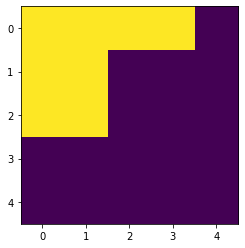

In [219]:
plt.imshow(unique_pieces[10])

In [220]:
tile_index = [0] * 4 + [1] * 2 + [2] * 8 + [3] * 4 + [4] * 4 + [5] * 4 + [6] * 4 + [7] * 8

In [221]:
dimensions = [find_dimension(unique_pieces[i]) for i in tile_index]

In [222]:
dimensions

[(4, 3),
 (4, 3),
 (4, 3),
 (4, 3),
 (4, 3),
 (4, 3),
 (3, 4),
 (3, 4),
 (3, 4),
 (3, 4),
 (3, 4),
 (3, 4),
 (3, 4),
 (3, 4),
 (3, 4),
 (3, 4),
 (3, 4),
 (3, 4),
 (2, 4),
 (2, 4),
 (2, 4),
 (2, 4),
 (4, 2),
 (4, 2),
 (4, 2),
 (4, 2),
 (3, 4),
 (3, 4),
 (3, 4),
 (3, 4),
 (3, 4),
 (3, 4),
 (3, 4),
 (3, 4),
 (3, 4),
 (3, 4),
 (3, 4),
 (3, 4)]

In [223]:
len(tile_index)

38

In [225]:
Z = get_matrix_for_pieces(unique_pieces, dimensions, 8)

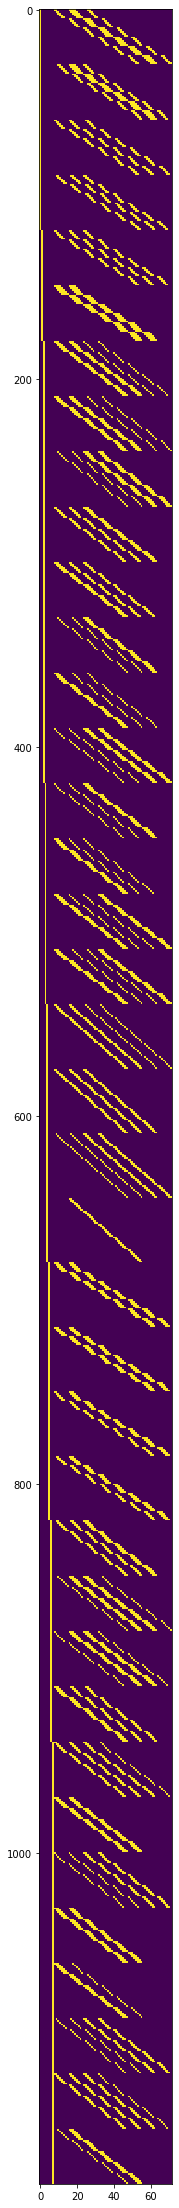

In [231]:
plt.figure(figsize=(12,40))
plt.imshow(Z)

In [232]:
len(Z)

1180

In [234]:
def prune_rows(row_index, M):
    rows = []
    for j in range(M.shape[1]):
        if M[row_index, j] == 1:
            for i in range(M.shape[0]):
                if M[i, j] == 1 and i != row_index:
                    rows.append(i)
    return rows

In [248]:
def show_solution(S, D):
    R = [[0] * D[1] for _ in range(D[0])]
    for shape_id, s in enumerate(S):
        for i in range(len(s)-8):
            if s[8:][i]:  # the first columns belong to the header
                r = i // 8
                c = i % 8
                R[c][r] = shape_id
    plt.imshow(R)

In [ ]:
def solve(M, S, cols, i=0):
    global sub_plot
    
    #plt.imshow(M)
    #plt.axis('off')
    #plt.show()
        
    
    if len(S) == 10: 
        return  # stop
    
    if M.shape[0] < cols:
        return  # bad sln
    
    if M.shape[0] == cols:
        
        #print('Solution: {}'.format(M))
        plt.imshow(M)
        plt.axis('off')
        S.append(M)
        plt.title('Solution {}'.format(sub_plot))
        plt.show()
        show_solution(M, (8, 8))
        plt.show()
        sub_plot += 1
        return
    
    for row in range(M.shape[0]):
        if M[row, i] == 1:
            N = np.delete(M, prune_rows(row, M), axis=0)
            valid = True
            for j in range(N.shape[1]):
                if sum(N[:,N.shape[1]-j-1]) == 0:
                    valid = False
                    break
            if valid:
                solve(N, S, cols, i + 1)
    

sub_plot = 1

S = []    
solve(np.array(Z), S, cols=8)
print('Number of solutions: {}'.format(len(S)))
plt.tight_layout()

In [254]:
Zx = np.matrix([[1,2],[3,4]])

In [256]:
sum(Zx[:,0])

4